# Importing the libraries and Datasets

In [32]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# Merged all the datasets

In [6]:
traindf1 = train.merge(features, how='left',indicator=True).merge(stores, how='left')

In [7]:
traindf1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315


In [8]:
traindf2 = traindf1.drop(["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5", "_merge"], axis=1)

In [9]:
traindf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 32.6+ MB


# Some data cleaning and EDA

In [10]:
traindf2["Date"] = pd.to_datetime(traindf2["Date"])

In [11]:
traindf2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [12]:
traindf2.query("Weekly_Sales <= 0")

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,B,118221


In [13]:
traindf3 = traindf2.query("Weekly_Sales > 0")
traindf3.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [14]:
traindf3.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
140804,15,21,2010-02-05,3253.19,False,19.83,2.954,131.527903,8.350,B,123737
140661,15,20,2010-02-05,4606.90,False,19.83,2.954,131.527903,8.350,B,123737
140518,15,19,2010-02-05,1381.40,False,19.83,2.954,131.527903,8.350,B,123737
140408,15,18,2010-02-05,2239.25,False,19.83,2.954,131.527903,8.350,B,123737
...,...,...,...,...,...,...,...,...,...,...,...
173673,18,52,2012-10-26,2226.10,False,56.09,3.917,138.728161,8.243,B,120653
342211,36,16,2012-10-26,564.50,False,74.39,3.494,222.113657,6.228,A,39910
390158,41,92,2012-10-26,131128.24,False,41.80,3.686,199.219532,6.195,A,196321
175485,18,81,2012-10-26,14036.52,False,56.09,3.917,138.728161,8.243,B,120653


In [15]:
traindf3["Type"].unique()

array(['A', 'B', 'C'], dtype=object)

<Axes: ylabel='count'>

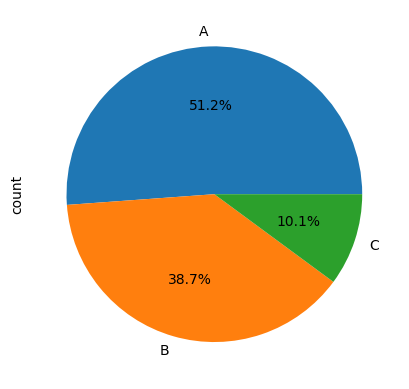

In [16]:
traindf3["Type"].value_counts().plot.pie(autopct='%1.1f%%')

In [17]:
iso_calendar = pd.to_datetime(traindf3['Date']).dt.isocalendar()
traindf3["year"] = iso_calendar.year
traindf3["month"] = pd.to_datetime(traindf3['Date']).dt.month
traindf3["week"] = iso_calendar.week

C:\Users\junai\AppData\Local\Temp\ipykernel_1344\737788266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf3["year"] = iso_calendar.year
C:\Users\junai\AppData\Local\Temp\ipykernel_1344\737788266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf3["month"] = pd.to_datetime(traindf3['Date']).dt.month
C:\Users\junai\AppData\Local\Temp\ipykernel_1344\737788266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [18]:
traindf3.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,9


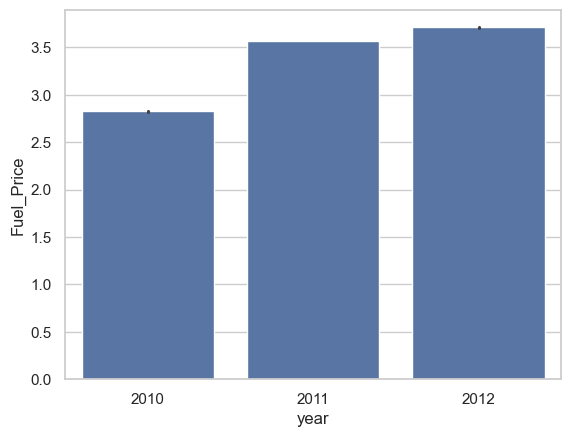

In [19]:
sns.set_theme(style='whitegrid')
tips = traindf3
ax = sns.barplot(x="year", y="Fuel_Price", data=tips)
sns.set(rc={"figure.figsize" : (10,4)})

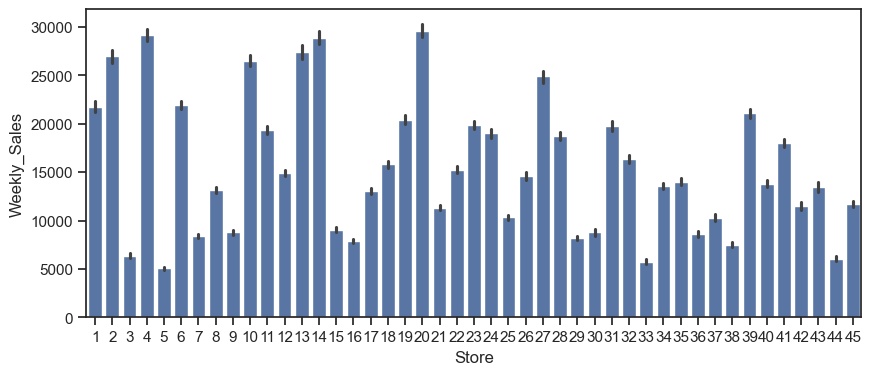

In [20]:
tips = traindf3
sns.set_theme(style='ticks')
ax = sns.barplot(x="Store", y="Weekly_Sales", data=tips)
sns.set(rc={"figure.figsize" : (10,4)})

<Axes: xlabel='Store', ylabel='Unemployment'>

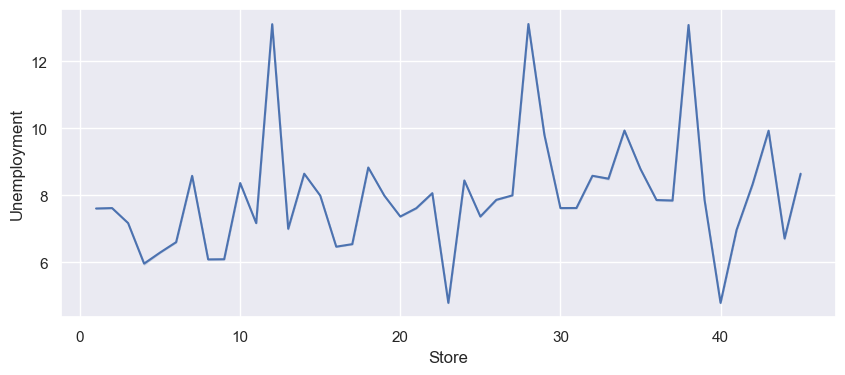

In [21]:
data = traindf3

sns.lineplot(x="Store", y="Unemployment", data=data)

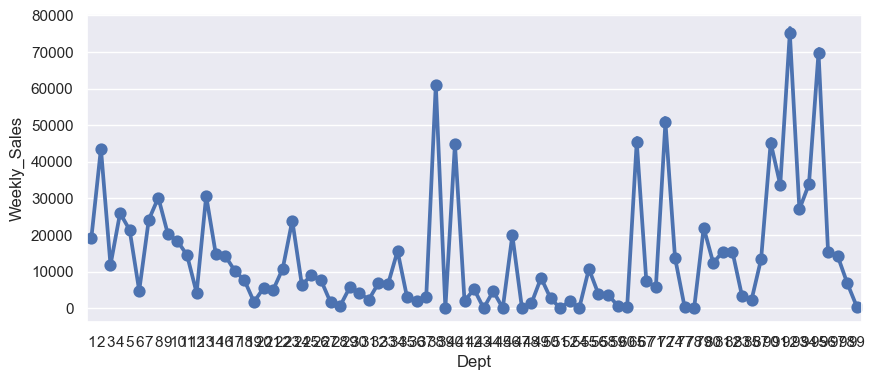

In [22]:
data = traindf3
sns.pointplot(x="Dept", y="Weekly_Sales", data=data)
sns.set(rc={"figure.figsize" : (25,8)})

<Axes: xlabel='month'>

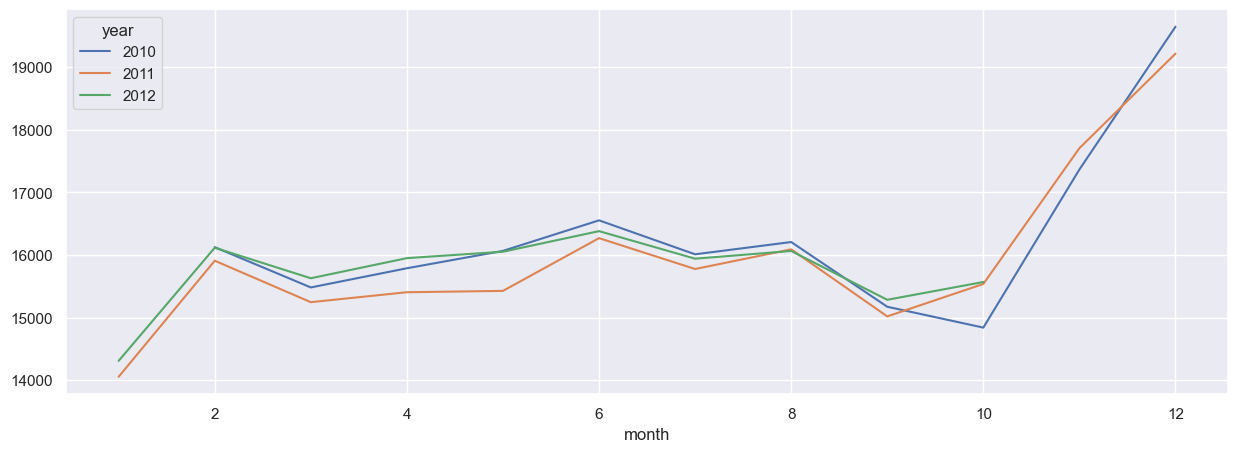

In [23]:
month_wise_sales = pd.pivot_table(traindf3, values='Weekly_Sales', index='month',columns='year')
month_wise_sales.plot(figsize=(15,5))

In [24]:
traindf3.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,2010-02-05,24924.5,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5


In [25]:
le = LabelEncoder()

traindf3["IsHoliday"] = le.fit_transform(traindf3["IsHoliday"])
traindf3['Type'] = le.fit_transform(traindf3['Type'])

C:\Users\junai\AppData\Local\Temp\ipykernel_1344\2709875917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf3["IsHoliday"] = le.fit_transform(traindf3["IsHoliday"])
C:\Users\junai\AppData\Local\Temp\ipykernel_1344\2709875917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf3['Type'] = le.fit_transform(traindf3['Type'])


In [26]:
traindf3.sample(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
35962,4,52,2011-10-07,4921.81,0,65.79,3.299,129.693800,5.143,0,205863,2011,10,40
393209,42,18,2010-02-12,1917.50,1,49.96,2.828,126.496258,9.765,2,39690,2010,2,6
69197,8,4,2010-03-19,19238.80,0,47.26,2.720,214.576495,6.299,0,155078,2010,3,11
274229,28,67,2011-01-07,3473.51,0,37.64,3.287,127.191774,14.021,0,206302,2011,1,1
142630,15,33,2012-03-16,4843.37,0,47.42,4.021,137.584387,7.943,1,123737,2012,3,11


In [27]:
traindf3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  int64         
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   CPI           420212 non-null  float64       
 8   Unemployment  420212 non-null  float64       
 9   Type          420212 non-null  int64         
 10  Size          420212 non-null  int64         
 11  year          420212 non-null  UInt32        
 12  month         420212 non-null  int32         
 13  week          420212 non-null  UInt32        
dtypes: UInt32(2), datetime64[ns](1), float64(5), int32(1), int64(5)
memory us

# Checking the feature importance with randomforest

In [28]:
Features = traindf3.drop(['Weekly_Sales'], axis=1)
Target = traindf3['Weekly_Sales']

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
Features = traindf3.drop(['Weekly_Sales', 'Date'], axis=1)
Target = traindf3['Weekly_Sales']

rfe = RandomForestRegressor(n_estimators=100, random_state=42)
rfe.fit(Features, Target)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


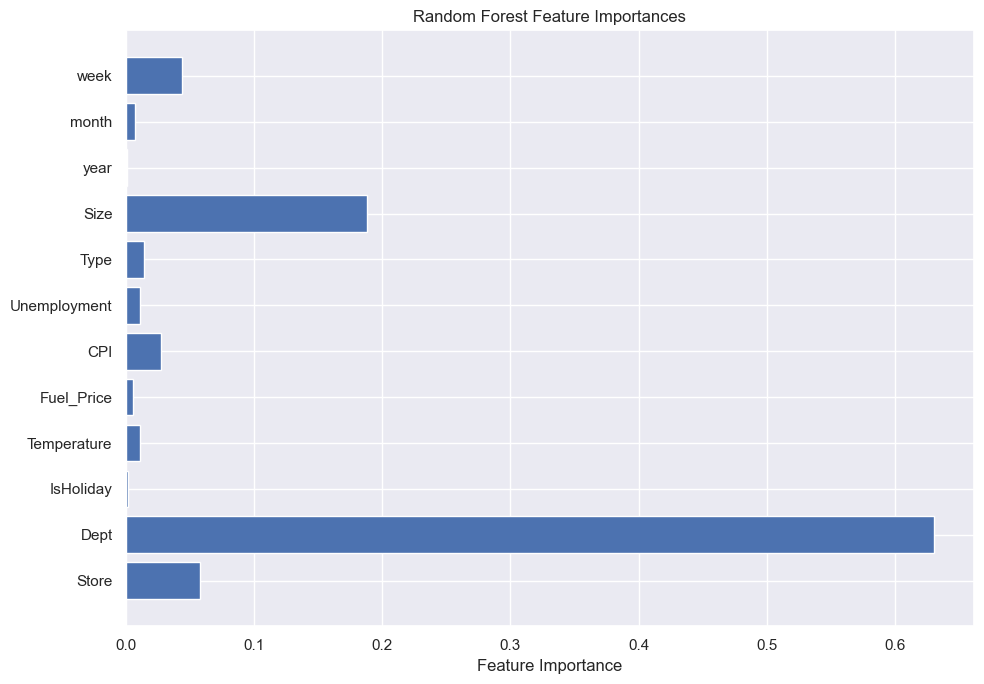

In [35]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.barh(Features.columns, rfe.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

# Dropped the columns with lowest importance

In [36]:
F = Features.drop(['year', 'IsHoliday'], axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(F, Target, test_size=0.2, random_state=42)

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# 1st model decisiontreeclassifier

In [46]:
dtr = DecisionTreeRegressor(random_state=0, max_depth=3)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 318564605.5723323
Mean Absolute Error: 11430.848963230277
R2 Score: 0.3763486619707458


# 2nd model randomforestclassifier

In [49]:
rf1 = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42, max_depth=35, max_features='sqrt',min_samples_split=10)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 63687808.90116832
Mean Absolute Error: 4654.337667450287
R2 Score: 0.8753188943699315


# 3rd model xbgboost classifier

In [54]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [55]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 27816688.764110837
Mean Absolute Error: 2948.46285704045
R2 Score: 0.9455434945884404


# Got best results with it.